## O que é mapeamento?
> O mapeamento é um processo fundamental na área de Inteligência Artificial (IA) e Machine Learning (ML), que envolve a identificação e a representação de dados em um formato que pode ser facilmente analisado e interpretado por algoritmos.

Obs: Os dados usados nesse projeto são fictícios

![](mapeamento.png)

In [3]:
import pandas as pd
import numpy as np

In [2]:
# Dados antes do mapeamento

data = {
       'age': [21, 19, 16, 42],
        'sexo': ['não-binário', 'masculino', 'feminino', 'masculino'],
        'isolamento': ['Nunca', 'Às vezes', 'Frequentemente', 'Sempre'],
        'ansiedade': ['Leve', 'Moderada', 'Grave', 'Moderada']
        }

df = pd.DataFrame(data)
df

,age,sexo,isolamento,ansiedade
0,21,não-binário,Nunca,Leve
1,19,masculino,Às vezes,Moderada
2,16,feminino,Frequentemente,Grave
3,42,masculino,Sempre,Moderada


In [3]:
map_isolamento = {'Nunca': 0, 'Às vezes': 1, 'Frequentemente': 2, 'Sempre': 3}

In [4]:
# Novo dataframe com mapeamento
df['isolamento'] = df['isolamento'].map(map_isolamento)

In [5]:
df

,age,sexo,isolamento,ansiedade
0,21,não-binário,0,Leve
1,19,masculino,1,Moderada
2,16,feminino,2,Grave
3,42,masculino,3,Moderada


## One hot econding com pandas

In [6]:
df = pd.get_dummies(df, columns=['sexo'])
df

,age,isolamento,ansiedade,sexo_feminino,sexo_masculino,sexo_não-binário
0,21,0,Leve,False,False,True
1,19,1,Moderada,False,True,False
2,16,2,Grave,True,False,False
3,42,3,Moderada,False,True,False


In [7]:
df.dtypes

age                  int64
isolamento           int64
ansiedade           object
sexo_feminino         bool
sexo_masculino        bool
sexo_não-binário      bool
dtype: object

In [8]:
# Mapeamento da ansiedade
map_ansiedade = {'Leve': 1,
                'Moderada': 2,
                'Grave': 3}

df['ansiedade'] = df['ansiedade'].map(map_ansiedade)
df

,age,isolamento,ansiedade,sexo_feminino,sexo_masculino,sexo_não-binário
0,21,0,1,False,False,True
1,19,1,2,False,True,False
2,16,2,3,True,False,False
3,42,3,2,False,True,False


In [9]:
# Média da ansiedade
print(f'Média de ansiedade: {df['ansiedade'].mean()}')

Média de ansiedade: 2.0


In [10]:
df['risco de saúde mental'] = df['isolamento'] + df['ansiedade']
df

,age,isolamento,ansiedade,sexo_feminino,sexo_masculino,sexo_não-binário,risco de saúde mental
0,21,0,1,False,False,True,1
1,19,1,2,False,True,False,3
2,16,2,3,True,False,False,5
3,42,3,2,False,True,False,5


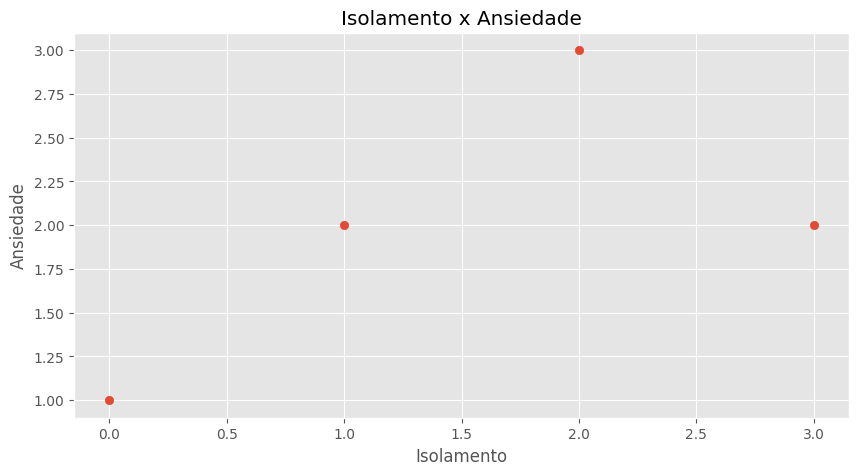

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 5))

# Correlação entre isolamento e ansiedade
x = df['isolamento']
y = df['ansiedade']

ax.set(title='Isolamento x Ansiedade',xlabel='Isolamento', ylabel='Ansiedade')
ax.scatter(x, y);

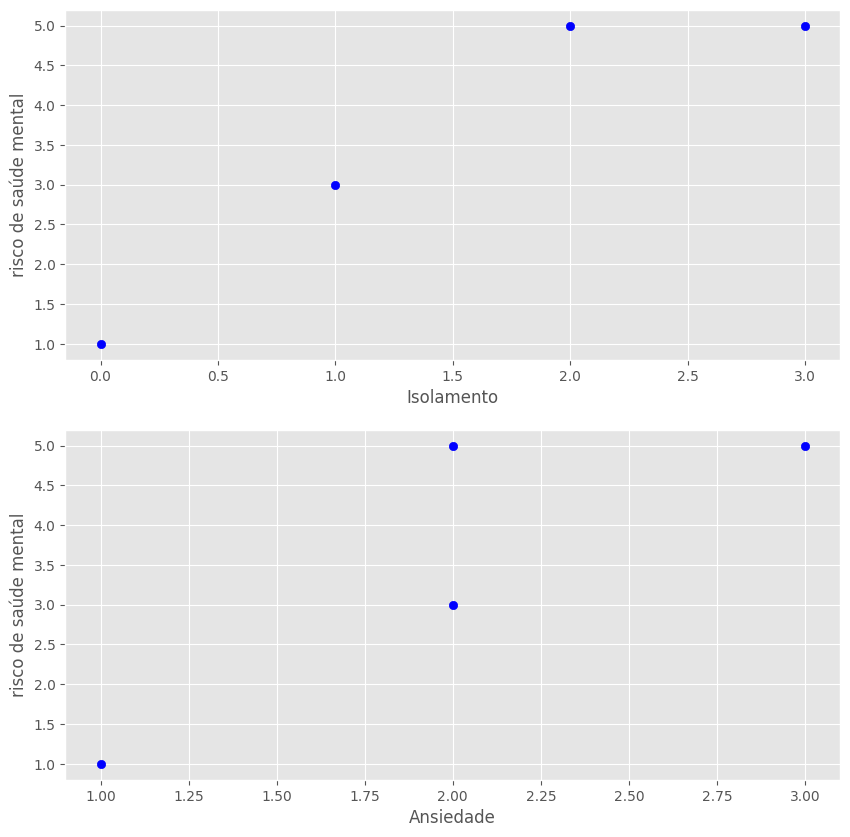

In [12]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 10))

# Correlação entre isolamento e saúde mental
ax0.scatter(df['isolamento'], df['risco de saúde mental'], c='blue')
ax0.set(xlabel='Isolamento', ylabel='risco de saúde mental')

# Correlação entre ansiedade e saúde mental
ax1.scatter(df['ansiedade'], df['risco de saúde mental'], c='blue')
ax1.set(xlabel='Ansiedade', ylabel='risco de saúde mental');

## Exemplo dois

In [13]:
dados = {
    "idade": [19, 22, 20, 25, 21, 24, 23, 20, 22, 26],
    "genero": ["Mulher", "Homem", "Homem", "Mulher", "Não-binário", "Homem", "Mulher", "Prefiro não dizer", "Mulher", "Outro"],
    "curso": ["Engenharia", "Psicologia", "Direito", "Medicina", "Ciência da Computação", "Administração", "Arquitetura", "Física", "História", "Design"],
    "periodo": [1, 3, 5, 7, 2, 10, 6, 4, 8, 9],
    "trabalha_ou_estagia": ["Sim", "Não", "Sim", "Sim", "Não", "Sim", "Não", "Não", "Sim", "Sim"],
    "horas_trabalho": [20, None, 15, 30, None, 40, None, None, 25, 20],
    "moradia": ["Com a família", "Sozinho(a)", "Com amigos", "Moradia estudantil", "Com a família", "Sozinho(a)", "Com a família", "Outro", "Moradia estudantil", "Com amigos"],
    
    # Seção 2 - sentimentos (valores de 1 a 5 para facilitar)
    "depressao": [3, 2, 4, 5, 3, 2, 1, 2, 3, 4],
    "prazer": [2, 3, 2, 4, 3, 4, 5, 3, 2, 1],
    "ansiedade": [3, 4, 5, 5, 2, 3, 2, 2, 4, 5],
    "preocupacao": [3, 3, 4, 5, 2, 3, 1, 2, 3, 5],
    "sono_ruim": [4, 2, 5, 5, 3, 2, 1, 3, 4, 4],
    "cansaco": [4, 3, 5, 4, 3, 3, 2, 3, 4, 5],
    "alimentacao_ruim": [3, 1, 4, 5, 2, 2, 1, 2, 3, 4],
    "autoimagem_negativa": [4, 2, 5, 4, 3, 3, 1, 2, 3, 4],
    "concentracao_ruim": [3, 2, 4, 5, 3, 2, 1, 2, 3, 4],
    "agitacao": [2, 1, 4, 5, 3, 2, 1, 1, 3, 5],
    "pensamentos_suicidas": ["Não", "Não", "Sim", "Sim", "Não", "Não", "Não", "Não", "Sim", "Sim"],

    # Seção 3 - vida acadêmica
    "impacto_academico": ["Moderado", "Pequeno", "Grande", "Muito grave", "Pequeno", "Moderado", "Nenhum", "Pequeno", "Grande", "Muito grave"],
    "motivacao_estudos": [3, 2, 1, 1, 3, 2, 4, 3, 2, 1],
    "faltou_aula": ["Algumas vezes", "Uma ou duas vezes", "Frequentemente", "Muito frequentemente", "Uma ou duas vezes", "Algumas vezes", "Nunca", "Nunca", "Algumas vezes", "Muito frequentemente"],

    # Seção 4 - apoio
    "isolamento": ["Às vezes", "Frequentemente", "Sempre", "Sempre", "Raramente", "Às vezes", "Nunca", "Às vezes", "Frequentemente", "Sempre"],
    "rede_apoio": ["Tenho poucas", "Sim, tenho algumas", "Não tenho ninguém", "Tenho poucas", "Sim, tenho muitas", "Tenho poucas", "Sim, tenho muitas", "Sim, tenho algumas", "Não tenho ninguém", "Sim, tenho algumas"],
    "apoio_familiar": ["Pouco", "Moderado", "Nenhum", "Pouco", "Muito", "Pouco", "Total", "Moderado", "Nenhum", "Moderado"],
    "atividades_sociais": ["Sinto-me um pouco à vontade", "Não me sinto à vontade", "Não me sinto à vontade", "Sinto-me um pouco à vontade", "Sinto-me à vontade na maioria das vezes", "Sinto-me um pouco à vontade", "Sinto-me totalmente à vontade", "Sinto-me à vontade na maioria das vezes", "Não me sinto à vontade", "Sinto-me um pouco à vontade"],

    # Seção 5 - hábitos
    "qualidade_sono": ["Regular", "Boa", "Ruim", "Muito ruim", "Boa", "Regular", "Muito boa", "Regular", "Ruim", "Muito ruim"],
    "alimentacao": ["Razoável", "Saudável", "Pouco saudável", "Muito pouco saudável", "Saudável", "Razoável", "Muito saudável", "Razoável", "Pouco saudável", "Muito pouco saudável"],
    "atividade_fisica": ["1-2 vezes por semana", "3-4 vezes por semana", "Nunca ou quase nunca", "1-2 vezes por semana", "5 ou mais vezes por semana", "3-4 vezes por semana", "5 ou mais vezes por semana", "1-2 vezes por semana", "Nunca ou quase nunca", "Nunca ou quase nunca"],
    "uso_substancias": ["Às vezes", "Nunca", "Frequentemente", "Muito frequentemente", "Raramente", "Às vezes", "Nunca", "Raramente", "Frequentemente", "Muito frequentemente"],

    # Seção 6 - suporte
    "conhece_servico_apoio": ["Sim, conheço bem", "Conheço um pouco", "Não conheço", "Não conheço", "Conheço um pouco", "Sim, conheço bem", "Sim, conheço bem", "Conheço um pouco", "Não conheço", "Não conheço"],
    "saberia_procurar_ajuda": ["Sim, saberia exatamente", "Acho que sim", "Não, não saberia", "Não, não saberia", "Sim, saberia exatamente", "Acho que sim", "Sim, saberia exatamente", "Acho que sim", "Não, não saberia", "Acho que sim"],
    "ja_buscou_ajuda": ["Sim, já busquei", "Sim, pensei mas não busquei", "Não, nunca pensei em buscar", "Sim, pensei mas não busquei", "Não, nunca pensei em buscar", "Sim, já busquei", "Sim, já busquei", "Sim, pensei mas não busquei", "Sim, pensei mas não busquei", "Não, nunca pensei em buscar"]
}

In [14]:
# Criando o DataFrame
df = pd.DataFrame(dados)
pd.set_option('display.max_columns', None)
df.head()

,idade,genero,curso,periodo,trabalha_ou_estagia,horas_trabalho,moradia,depressao,prazer,ansiedade,preocupacao,sono_ruim,cansaco,alimentacao_ruim,autoimagem_negativa,concentracao_ruim,agitacao,pensamentos_suicidas,impacto_academico,motivacao_estudos,faltou_aula,isolamento,rede_apoio,apoio_familiar,atividades_sociais,qualidade_sono,alimentacao,atividade_fisica,uso_substancias,conhece_servico_apoio,saberia_procurar_ajuda,ja_buscou_ajuda
0,19,Mulher,Engenharia,1,Sim,20.0,Com a família,3,2,3,3,4,4,3,4,3,2,Não,Moderado,3,Algumas vezes,Às vezes,Tenho poucas,Pouco,Sinto-me um pouco à vontade,Regular,Razoável,1-2 vezes por semana,Às vezes,"Sim, conheço bem","Sim, saberia exatamente","Sim, já busquei"
1,22,Homem,Psicologia,3,Não,NaN,Sozinho(a),2,3,4,3,2,3,1,2,2,1,Não,Pequeno,2,Uma ou duas vezes,Frequentemente,"Sim, tenho algumas",Moderado,Não me sinto à vontade,Boa,Saudável,3-4 vezes por semana,Nunca,Conheço um pouco,Acho que sim,"Sim, pensei mas não busquei"
2,20,Homem,Direito,5,Sim,15.0,Com amigos,4,2,5,4,5,5,4,5,4,4,Sim,Grande,1,Frequentemente,Sempre,Não tenho ninguém,Nenhum,Não me sinto à vontade,Ruim,Pouco saudável,Nunca ou quase nunca,Frequentemente,Não conheço,"Não, não saberia","Não, nunca pensei em buscar"
3,25,Mulher,Medicina,7,Sim,30.0,Moradia estudantil,5,4,5,5,5,4,5,4,5,5,Sim,Muito grave,1,Muito frequentemente,Sempre,Tenho poucas,Pouco,Sinto-me um pouco à vontade,Muito ruim,Muito pouco saudável,1-2 vezes por semana,Muito frequentemente,Não conheço,"Não, não saberia","Sim, pensei mas não busquei"
4,21,Não-binário,Ciência da Computação,2,Não,NaN,Com a família,3,3,2,2,3,3,2,3,3,3,Não,Pequeno,3,Uma ou duas vezes,Raramente,"Sim, tenho muitas",Muito,Sinto-me à vontade na maioria das vezes,Boa,Saudável,5 ou mais vezes por semana,Raramente,Conheço um pouco,"Sim, saberia exatamente","Não, nunca pensei em buscar"


In [15]:
# Verificando informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   10 non-null     int64  
 1   genero                  10 non-null     object 
 2   curso                   10 non-null     object 
 3   periodo                 10 non-null     int64  
 4   trabalha_ou_estagia     10 non-null     object 
 5   horas_trabalho          6 non-null      float64
 6   moradia                 10 non-null     object 
 7   depressao               10 non-null     int64  
 8   prazer                  10 non-null     int64  
 9   ansiedade               10 non-null     int64  
 10  preocupacao             10 non-null     int64  
 11  sono_ruim               10 non-null     int64  
 12  cansaco                 10 non-null     int64  
 13  alimentacao_ruim        10 non-null     int64  
 14  autoimagem_negativa     10 non-null     int64

In [16]:
# Valores faltantes
df.isna().sum()

idade                     0
genero                    0
curso                     0
periodo                   0
trabalha_ou_estagia       0
horas_trabalho            4
moradia                   0
depressao                 0
prazer                    0
ansiedade                 0
preocupacao               0
sono_ruim                 0
cansaco                   0
alimentacao_ruim          0
autoimagem_negativa       0
concentracao_ruim         0
agitacao                  0
pensamentos_suicidas      0
impacto_academico         0
motivacao_estudos         0
faltou_aula               0
isolamento                0
rede_apoio                0
apoio_familiar            0
atividades_sociais        0
qualidade_sono            0
alimentacao               0
atividade_fisica          0
uso_substancias           0
conhece_servico_apoio     0
saberia_procurar_ajuda    0
ja_buscou_ajuda           0
dtype: int64

In [17]:
df['horas_trabalho'] = df['horas_trabalho'].fillna(0)
df.isna().sum()

idade                     0
genero                    0
curso                     0
periodo                   0
trabalha_ou_estagia       0
horas_trabalho            0
moradia                   0
depressao                 0
prazer                    0
ansiedade                 0
preocupacao               0
sono_ruim                 0
cansaco                   0
alimentacao_ruim          0
autoimagem_negativa       0
concentracao_ruim         0
agitacao                  0
pensamentos_suicidas      0
impacto_academico         0
motivacao_estudos         0
faltou_aula               0
isolamento                0
rede_apoio                0
apoio_familiar            0
atividades_sociais        0
qualidade_sono            0
alimentacao               0
atividade_fisica          0
uso_substancias           0
conhece_servico_apoio     0
saberia_procurar_ajuda    0
ja_buscou_ajuda           0
dtype: int64

### Mapeamento de alguns valores não numéricos

In [18]:
map_trabalho = {'Sim': 1,
               'Não': 0}

map_substancias = {'Nunca': 0,
                  'Raramente': 1,
                  'Às vezes': 2,
                  'Frequentemente': 3,
                  'Muito frequentemente': 4}

map_sono = {'Muito boa': 4,
           'Boa': 3,
           'Regular': 2,
           'Ruim': 1,
           'Muito ruim': 0}

map_alimentacao = {
    'Muito pouco saudável': 0,
    'Pouco saudável': 1,
    'Razoável': 2,
    'Saudável': 3,
    'Muito saudável': 4}

map_suicidio = {'Sim': 1,
               'Não': 0}


map_at_fisica = {'Nunca ou quase nunca': 0,
                '1-2 vezes por semana': 1,
                '3-4 vezes por semana': 2,
                '5 ou mais vezes por semana':3}

df['trabalha_ou_estagia'] = df['trabalha_ou_estagia'].map(map_trabalho)
df['qualidade_sono'] = df['qualidade_sono'].map(map_sono)
df['alimentacao'] = df['alimentacao'].map(map_alimentacao)
df['uso_substancias'] = df['uso_substancias'].map(map_substancias)
df['pensamentos_suicidas'] = df['pensamentos_suicidas'].map(map_suicidio)
df['atividade_fisica'] = df['atividade_fisica'].map(map_at_fisica)

# 1. Estatísticas descritivas
a) Qual a média de idade dos participantes?

b) Quantos participantes estão em cada período?

c) Qual a proporção de estudantes que trabalham ou estagiam?

In [19]:
# A)
media_idade = df['idade'].mean()
print(f"Idade média: {media_idade:.0f}")

Idade média: 22


In [20]:
# B)
print('Estudantes por período: ')
df['periodo'].value_counts()

Estudantes por período: 


periodo
1     1
3     1
5     1
7     1
2     1
10    1
6     1
4     1
8     1
9     1
Name: count, dtype: int64

In [21]:
# C)
print('Proporção dos que trabalham/estagiam: ', end=' ')
work_intern = df[df['trabalha_ou_estagia'] == 1]
proportion = (len(work_intern)/len(df))*100
print(f'{proportion:.2f}%')

Proporção dos que trabalham/estagiam:  60.00%


# 2. Filtros e segmentações

a) Quantos alunos com pensamentos suicidas também relataram alta frequência de ansiedade (valores 4 ou 5)?

b) Liste os cursos com mais estudantes que afirmaram não ter rede de apoio.

c) Qual a média de horas de trabalho para quem sente “grande impacto” ou “impacto muito grave” nos estudos?

In [22]:
# a)
em_risco = df[(df['pensamentos_suicidas'] == 1) & (df['ansiedade'] >= 4)]
print(f"Alunos em risco: {len(em_risco)}")

Alunos em risco: 4


In [23]:
# b)
sem_ninguem = df['rede_apoio'] == 'Não tenho ninguém'

# Cursos
cursos = df[sem_ninguem]['curso'].value_counts()
cursos

curso
Direito     1
História    1
Name: count, dtype: int64

In [24]:
# c)
# Um filtro, como no exemplo abaixo, não filtra os resultados
sente_impacto = (df['impacto_academico'] == 'Grande') | (df['impacto_academico'] == 'Muito grave')
media = df[sente_impacto]['horas_trabalho'].mean()
print(f'{media} horas trabalhadas em média')

22.5 horas trabalhadas em média


# 3. Cruzamentos de dados

a) Existe diferença na frequência de isolamento entre homens e mulheres?

b) Estudantes com sono ruim ou muito ruim têm mais pensamentos suicidas?

c) Compare a motivação média entre alunos com e sem apoio familiar.

In [25]:
# a)
pd.crosstab(df['genero'], [df['isolamento']])

isolamento,Frequentemente,Nunca,Raramente,Sempre,Às vezes
genero,,,,,
Homem,1,0,0,1,1
Mulher,1,1,0,1,1
Não-binário,0,0,1,0,0
Outro,0,0,0,1,0
Prefiro não dizer,0,0,0,0,1


In [26]:
# a)
(pd.crosstab(df['genero'], df['isolamento'], normalize='index')*100).round(2)

isolamento,Frequentemente,Nunca,Raramente,Sempre,Às vezes
genero,,,,,
Homem,33.33,0.0,0.0,33.33,33.33
Mulher,25.00,25.0,0.0,25.00,25.00
Não-binário,0.00,0.0,100.0,0.00,0.00
Outro,0.00,0.0,0.0,100.00,0.00
Prefiro não dizer,0.00,0.0,0.0,0.00,100.00


In [27]:
# b)
sono = df[(df['qualidade_sono'] == 1) | (df['qualidade_sono'] == 0)]
pd.crosstab(sono['qualidade_sono'], df['pensamentos_suicidas'])

pensamentos_suicidas,1
qualidade_sono,
0,2
1,2


In [28]:
# c)
apoio = df[(df['apoio_familiar'] == 'Total') | (df['apoio_familiar'] == 'Nenhum')]
pd.crosstab(apoio['apoio_familiar'], df['motivacao_estudos'])

motivacao_estudos,1,2,4
apoio_familiar,,,
Nenhum,1,1,0
Total,0,0,1


# 4. Visualizações

a) Faça um gráfico de barras com a quantidade de alunos por período.
    
b) Crie um boxplot comparando a qualidade do sono com os níveis de ansiedade.
    
c) Monte um heatmap de correlação (usando apenas colunas numéricas: idade, ansiedade, motivação, etc.).

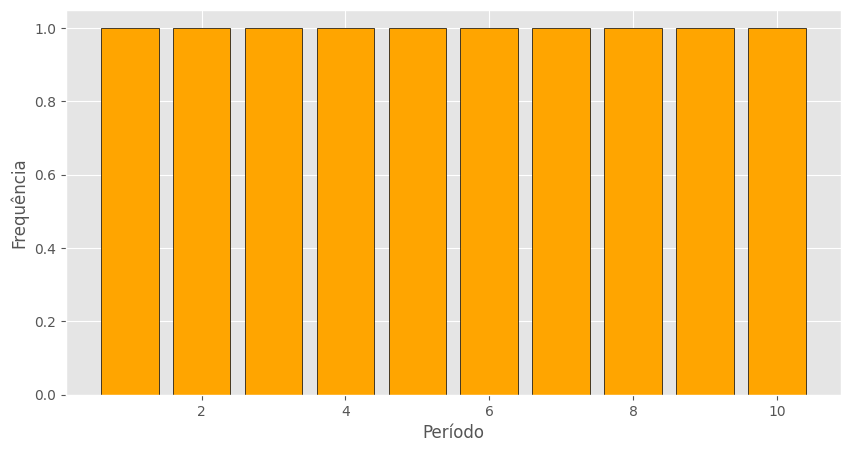

In [29]:
# a)
fig, ax = plt.subplots(figsize=(10, 5))
data_plot = df['periodo']
ax.bar([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], data_plot.value_counts(), color='orange', edgecolor='black')
ax.set(xlabel='Período', ylabel='Frequência');

In [30]:
# b)
import seaborn as sns
# Criar boxplots da ansiedade (ou depressao, etc.) para cada categoria de qualidade_sono (já numérica).
# Isso significa que teremos múltiplos boxplots de ansiedade, um para cada nível de sono.

# Plot the data with seabon
sns.boxplot(x='qualidade_sono', y='ansiedade', data=df);

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# c)
numerical_columns = {'idade': df['idade'],
                    'ansiedade': df['ansiedade'],
                    'alimentacao': df['alimentacao'],
                    'substancias': df['uso_substancias'],
                    'at. física': df['atividade_fisica']}

df1 = pd.DataFrame(numerical_columns)

# Matriz de correlação
mat_corr = df1.corr()

# Criando o heatmap
sns.heatmap(mat_corr, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Heatmap de correlações');

### Vamos investigar mais a fundo correlações fortes tanto positivas quanto negativas

1. Alimentação x Substância

2. Alimentação x Ansiedade

3. Atividade física x Ansiedade

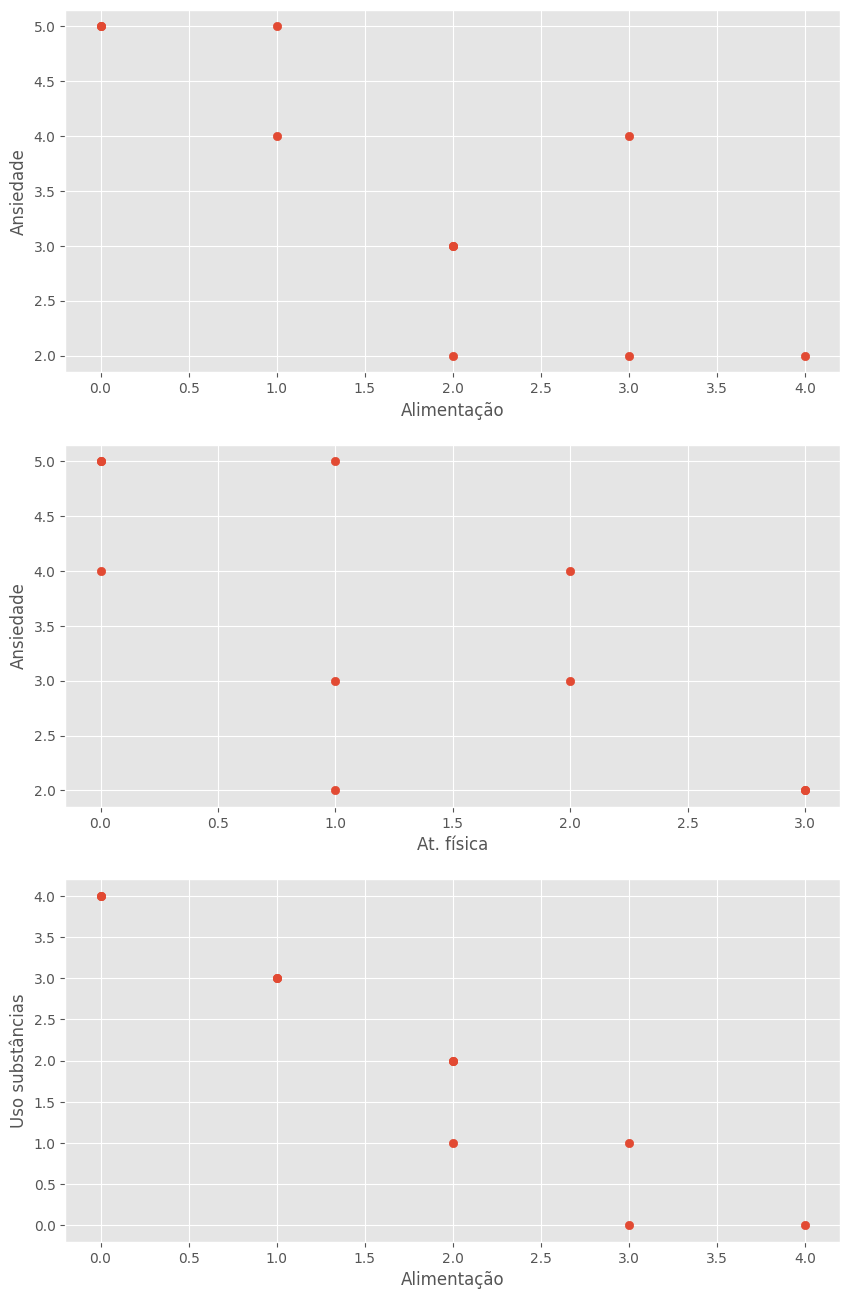

In [102]:
# Creating the figure
fig, (a, b, c) = plt.subplots(3, 1, figsize=(10, 16))

# Make the data
ax = df['alimentacao']
ay = df['ansiedade']

bx = df['atividade_fisica']
by = df['ansiedade']

cx = df['alimentacao']
cy = df['uso_substancias']

# Plot the data
a.scatter(ax, ay)
b.scatter(bx, by)
c.scatter(cx, cy)

# Setting titles and labels
a.set(xlabel='Alimentação', ylabel='Ansiedade')
b.set(xlabel='At. física', ylabel='Ansiedade')
c.set(xlabel='Alimentação', ylabel='Uso substâncias');

### Talvez pela pouca quantidade de dados não foi possível observar uma correlação(linear) forte entre as variáveis supracitadas como foi mostrado no heatmap.

# 5. Insights e hipóteses

a) Qual comportamento parece mais associado à falta de motivação: má qualidade do sono, uso de substâncias ou ausência de rede de apoio?

b) Qual grupo apresenta maior risco: quem mora sozinho ou quem está em moradia estudantil?

In [103]:
# a)
moti_sono = pd.crosstab(df['qualidade_sono'], df['motivacao_estudos'])
moti_addiction = pd.crosstab(df['uso_substancias'], df['motivacao_estudos'])
moti_apoio = pd.crosstab(df['apoio_familiar'], df['motivacao_estudos'])

print(moti_sono)
print('-=-'*10)
print(moti_addiction)
print('-=-'*10)
print(moti_apoio)

motivacao_estudos  1  2  3  4
qualidade_sono               
0                  2  0  0  0
1                  1  1  0  0
2                  0  1  2  0
3                  0  1  1  0
4                  0  0  0  1
-=--=--=--=--=--=--=--=--=--=-
motivacao_estudos  1  2  3  4
uso_substancias              
0                  0  1  0  1
1                  0  0  2  0
2                  0  1  1  0
3                  1  1  0  0
4                  2  0  0  0
-=--=--=--=--=--=--=--=--=--=-
motivacao_estudos  1  2  3  4
apoio_familiar               
Moderado           1  1  1  0
Muito              0  0  1  0
Nenhum             1  1  0  0
Pouco              1  1  1  0
Total              0  0  0  1


### O fator que parece mais impactar a falta de motivação é a falta de uma rede de apoio

In [104]:
# b)
# Quem mora só ou em moradia estudantil
filtro_moradia = df[(df['moradia'] == 'Sozinho(a)') | (df['moradia'] == 'Moradia estudantil')]
risco_moradia = pd.crosstab(filtro_moradia['moradia'], df['pensamentos_suicidas'])
risco_moradia

pensamentos_suicidas,0,1
moradia,,
Moradia estudantil,0,2
Sozinho(a),2,0


### O grupo que apresentar maior risco são os estudantes que moram em _moradia estudantil_.